# SALES PREDICTION

# Importing all required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Wrangling

In [2]:
df=pd.read_csv("advertising.csv")

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.shape

(200, 4)

In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Data Visualization

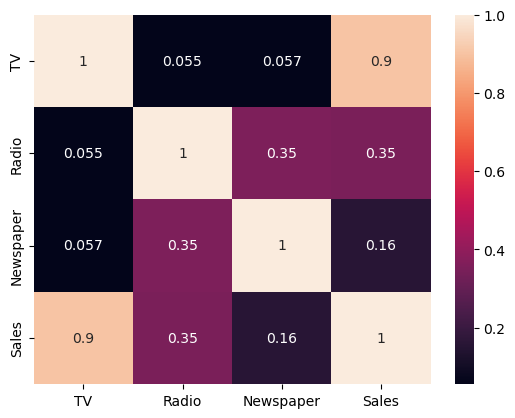

In [8]:
sns.heatmap(df.corr(),annot=True)
plt.show()

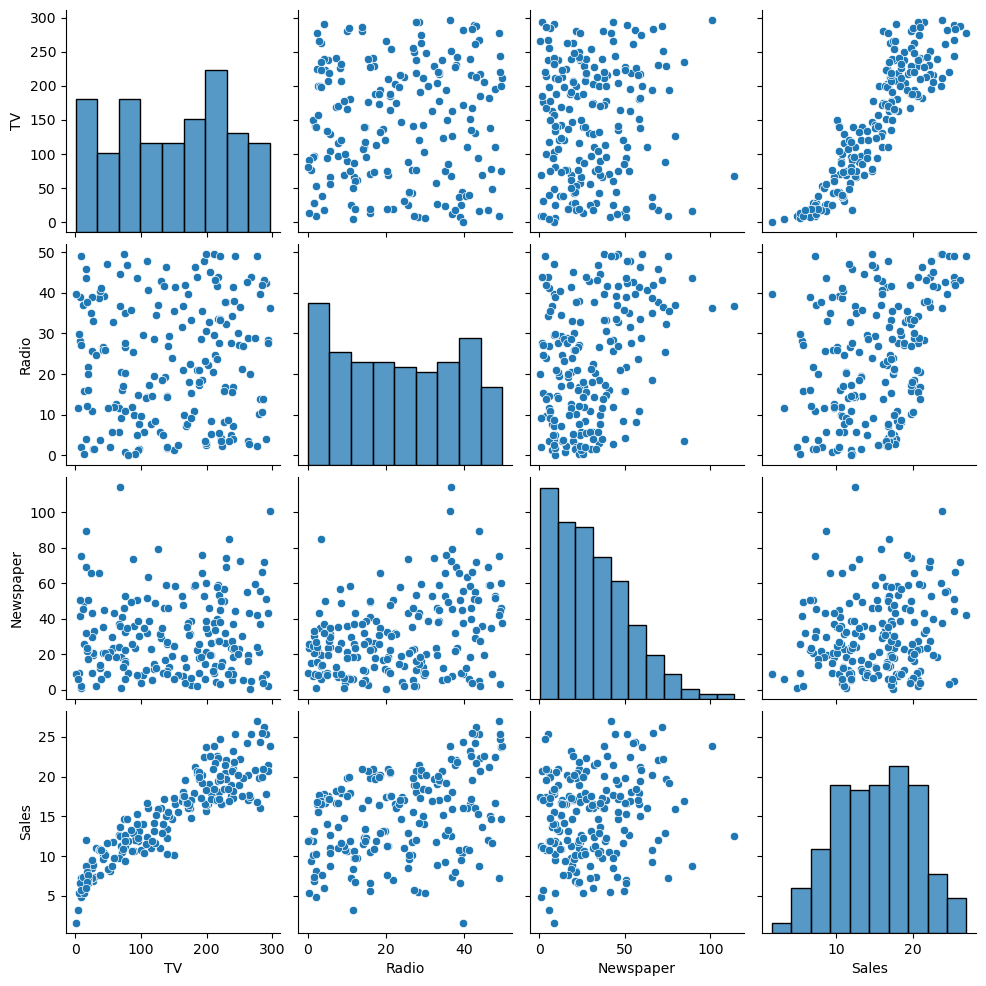

In [9]:
sns.pairplot(data=df)
plt.show()

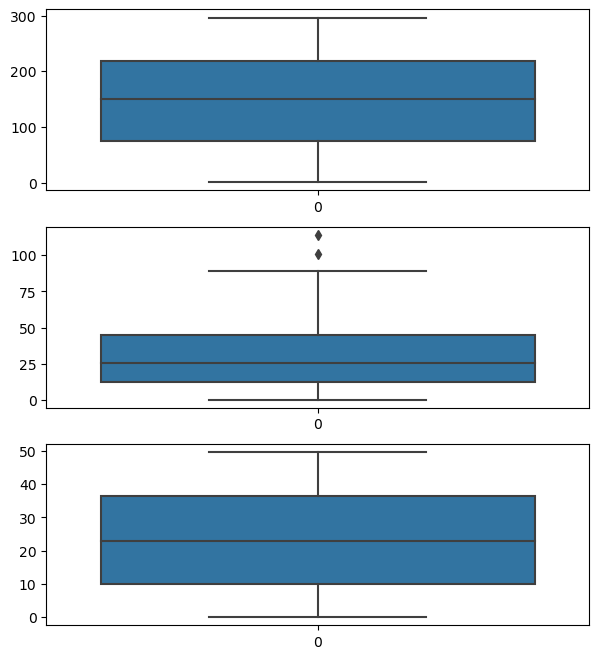

In [10]:
fig, axs = plt.subplots(3, figsize = (7,8))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.show()

# Here we can see that there is a slight oulier in the newspaper but its managable

In [11]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [12]:
X=df.drop(columns=['Sales'],axis=1)

In [13]:
y=df['Sales']

# Model Building

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(160, 3) (40, 3) (160,) (40,)


In [16]:
lr=LinearRegression()
svr=SVR()
rr=Ridge()
lasso=Lasso()
abr=AdaBoostRegressor()
gbr=GradientBoostingRegressor()
xgbr=XGBRegressor()

In [17]:
def model_prediction(model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(model)
    print("R2 Score : ",r2_score(y_test,y_pred))
    print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))
    print('-'*100)

In [18]:
model_prediction(lr)
model_prediction(svr)
model_prediction(rr)
model_prediction(lasso)
model_prediction(abr)
model_prediction(gbr)
model_prediction(xgbr)

LinearRegression()
R2 Score :  0.9059011844150826
Mean Absolute Error :  1.2748262109549338
----------------------------------------------------------------------------------------------------
SVR()
R2 Score :  0.886764963148391
Mean Absolute Error :  1.4836223881587627
----------------------------------------------------------------------------------------------------
Ridge()
R2 Score :  0.9058999159458062
Mean Absolute Error :  1.2748301536195636
----------------------------------------------------------------------------------------------------
Lasso()
R2 Score :  0.9052166208889012
Mean Absolute Error :  1.2725851163834117
----------------------------------------------------------------------------------------------------
AdaBoostRegressor()
R2 Score :  0.937880847551407
Mean Absolute Error :  1.1605732090301504
----------------------------------------------------------------------------------------------------
GradientBoostingRegressor()
R2 Score :  0.9585608905127293
Mean Absolut

In [19]:
# Here we can see clearly that GradientBoostingRegressor gives the best r2_score value for it so lets hypertune it

# Hypertunning of GradientBoostingRegressor using GridSearchCV

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

In [22]:
gscv=GridSearchCV(estimator=xgbr,param_grid=param_grid,cv=3,n_jobs=-1,scoring='r2')

In [23]:
gscv.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='r2')

In [24]:
y_pred=gscv.predict(X_test)

In [25]:
r2_score(y_test,y_pred)

0.9605404001353606

In [26]:
final_model=gscv.best_estimator_

# Predicting the sale of sample data with the model 

In [27]:
sample_data=pd.DataFrame({'TV':[230.1],'Radio':[37.8],'Newspaper':[69.2]})
print(final_model.predict(sample_data))

[22.06068]


# Exporting the Model using pickle

In [28]:
import pickle
with open('sale_prediction_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)
